## The Variational Method

The variational method is a simple approach to finding the energy of the ground state of a system.  We write a *trial* wavevector which depends on one or more parameters, and then vary the parameters to find the lowest energy.  We will show in lectures that this always gives an *upper bound* to the energy of the system; we define the energy for the system in the trial state as:

$$
E(\lambda) = \frac{\langle \psi(\lambda) \vert \hat{H} \vert \psi(\lambda) \rangle}{\langle \psi(\lambda)\vert \psi(\lambda)\rangle}
$$

where $\lambda$ is the parameter.

We will start with a simple example: finding the optimum value of the exponent, $\alpha$, for the ground state of the quantum harmonic oscillator.  As we know the exact answer, we can check that the approach is correct.

In [1]:
# Import libraries and set up in-line plotting.
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

# Define the x-axis from -width to +width
# This makes the QHO finite in width, which is an approximation
# We will need to be careful not to make omega too small
width = 10.0
num_x_points = 1001
x = np.linspace(-width,width,num_x_points)
dx = 2.0*width/(num_x_points - 1)

# Integrate two functions over the width of the well
def integrate_functions(f1,f2,size_x,dx):
    """Integrate two functions over defined x range"""
    sum = 0.0
    for i in range(size_x):
        sum = sum + f1[i]*f2[i]
    sum = sum*dx
    return sum

# Define a function to act on a basis function with the potential
def add_pot_on_basis(Hphi,V,phi):
    for i in range(V.size):
        Hphi[i] = Hphi[i] + V[i]*phi[i]

In [2]:
# Define the potential in the square well
def square_well_potential(x,V,a):
    """Potential for a particle in a square well, expecting two arrays: x, V(x), and potential height, a"""
    for i in range(x.size):
        V[i] = 0.5*a*x[i]*x[i]
    # If necessary, plot to ensure that we know what we're getting
    #pl.plot(x,V)
    


Now let's define the trial function to use, which will be a gaussian:
$$f(x) = A exp(-0.5\alpha^2 x^2)$$

We'll also need its second derivative for the energy, which we can find analytically in this case:
$$df/dx = -x\alpha^2 A exp(-0.5\alpha x^2)$$
$$d2f/dx2 = -\alpha^2 A exp(-0.5\alpha x^2) + \alpha^4 x^2 A exp(-0.5\alpha x^2) = \alpha^2 A (\alpha^2 x^2 -1) exp(-0.5\alpha x^2)$$

From theory, E min, alpha:  1.0 1.41421356237
Norm is:  1.0


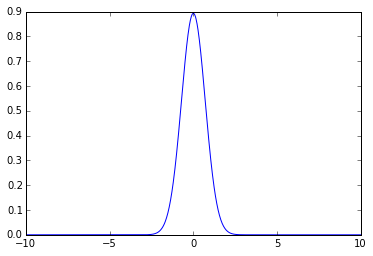

In [3]:
from math import pi
root_pi = np.sqrt(pi)
# Define a gaussian with proper normalisation as our test function
def gauss(x,alpha):
    return np.sqrt(alpha / (root_pi))* np.exp(-0.5 * alpha**2 * x**2)
# We can also write the second derivative function easily enough
def d2gauss(x,alpha):
    return np.sqrt(alpha / (root_pi))* alpha*alpha * (alpha*alpha*x*x - 1) * np.exp(-0.5 * alpha**2 * x**2)

# Declare space for the potential and call the routine
omega = 2.0 # Set the frequency
VQHO = np.linspace(0.0,width,num_x_points)
square_well_potential(x,VQHO,omega*omega)
print "From theory, E min, alpha: ",0.5*omega,np.sqrt(omega)
psi = gauss(x,np.sqrt(omega))
# Check that I've normalised the gaussian correctly
print "Norm is: ",integrate_functions(psi,psi,num_x_points,dx)
pl.plot(x,psi)

Now that we have the trial function, with the parameter $\alpha$ as our variational parameter, we can vary the energy and look for the minimum.  We'll do this in a **very** crude way, just scanning values of $\alpha$.  There are much better approaches, though, which we will address in a later notebook.

Energy at optimum alpha is:  1.0
Min E and alph:  1.0000178072 1.41


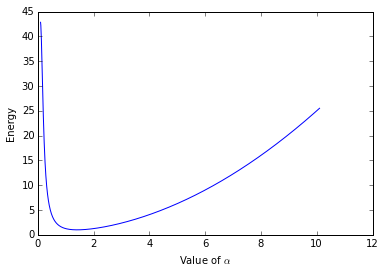

In [4]:
psi = gauss(x,np.sqrt(omega))
# Kinetic energy
Hpsi = -0.5*d2gauss(x,np.sqrt(omega))
# Add potential
add_pot_on_basis(Hpsi,VQHO,psi)
# Check the exact answer - we won't be able to do this normally !
print "Energy at optimum alpha is: ",integrate_functions(psi,Hpsi,num_x_points,dx)

alpha_vals = np.linspace(0.1,10.1,1001)
energy = np.zeros(1001)
i=0
e_min = 1e30
alph_min = 0.0
for alpha in alpha_vals:
    psi = gauss(x,alpha)
    norm = integrate_functions(psi,psi,num_x_points,dx)
    #if np.abs(norm-1.0)>1e-6:
    #    print "Norm error: ",alpha,norm
    Hpsi = -0.5*d2gauss(x,alpha)
    add_pot_on_basis(Hpsi,VQHO,psi)
    energy[i] = integrate_functions(psi,Hpsi,num_x_points,dx)
    if energy[i]<e_min:
        e_min = energy[i]
        alpha_min = alpha
    i=i+1
print "Min E and alph: ",e_min, alpha_min
pl.plot(alpha_vals,energy)
pl.xlabel(r"Value of $\alpha$")
pl.ylabel("Energy")

We see that the scanning of $\alpha$ gives us a reasonably accurate answer: the exact answer is $\sqrt{2}$, and we could find that with a more sophisticated search routine.  The method works, certainly for this simple problem.

### Mixing states

The classic examples for the variational approach generally are similar to the example above: we specify a functional form for the trial wavefunction and vary the parameter (or parameters) to find the minimum energy.  But we can also treat the expansion coefficients of a set of basis functions as the variational parameters.  So we might write:

$$
\vert \psi\rangle = c_1 \vert \phi_1 \rangle + c_2 \vert \phi_2\rangle
$$

where we are mixing the first two basis states for a system together.  This is what is often done in practical quantum mechanical calculations (though we tend to use several tens, hundreds or thousands of basis coefficients, which requires a more sophisticated approach to minimisation).

Notice that we can actually simplify the problem above: we will insist that $\langle \psi\vert \psi\rangle = 1$, so we can write $c_1^2 + c_2^2 = 1$.  If we set $c_1 = 1$ and treat $c_2$ as the only parameter, then we can write:

$$
E = \frac{\langle \psi\vert \hat{H} \vert \psi\rangle}{\langle \psi\vert \psi \rangle}
$$

and then solve $\partial E/\partial c_2 = 0$.

#### Practical example

We will apply an electric field to a perfect square well (so that the potential is just proportional to $x$) and see how well mixing the first two states works as an approximation to the ground state of the new system.  We looked at this in the notebook "An odd perturbation"; you should be well used to the square well by now, so I won't explain what we're doing below in great detail.

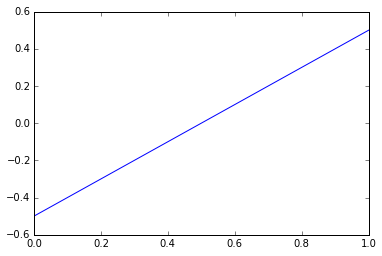

In [5]:
# Define the eigenbasis - normalisation needed elsewhere
def eigenbasis_sw(n,width,norm,x):
    """The eigenbasis for a square well, running from 0 to a, sin(n pi x/a)"""
    fac = np.pi*n/width
    return norm*np.sin(fac*x)

# We will also define the second derivative for kinetic energy (KE)
def d2eigenbasis_sw(n,width,norm,x):
    """The eigenbasis for a square well, running from 0 to a, sin(n pi x/a)"""
    fac = np.pi*n/width
    return -fac*fac*norm*np.sin(fac*x)

# Define the x-axis
width = 1.0
num_x_points = 101
x = np.linspace(0.0,width,num_x_points)
dx = width/(num_x_points - 1)
# Now set up the array of basis functions - specify the size of the basis
num_basis = 10
# These arrays will each hold an array of functions
basis_array = np.zeros((num_basis,num_x_points))
d2basis_array = np.zeros((num_basis,num_x_points))

# Loop over first num_basis basis states, normalise and create an array
# NB the basis_array will start from 0
for i in range(num_basis):
    n = i+1
    # Calculate A = <phi_n|phi_n>
    integral = integrate_functions(eigenbasis_sw(n,width,1.0,x),eigenbasis_sw(n,width,1.0,x),num_x_points,dx)
    # Use 1/sqrt{A} as normalisation constant
    normalisation = 1.0/np.sqrt(integral)
    basis_array[i,:] = eigenbasis_sw(n,width,normalisation,x)
    d2basis_array[i,:] = d2eigenbasis_sw(n,width,normalisation,x)

# Define the potential in the square well
def square_well_linear_potential(x,V,a):
    """Potential for a particle in a square well, expecting two arrays: x, V(x), and potential height, a"""
    for i in range(x.size):
        V[i] = a*(x[i]-width/2.0)
    # Plot to ensure that we know what we're getting
    pl.plot(x,V)
    
# Declare space for this potential (Vdiag) and call the routine
Vdiag = np.linspace(0.0,width,num_x_points)
square_well_linear_potential(x,Vdiag,1.0)

Now build the Hamiltonian - we could actually evaluate the expectation value by using vector-matrix-vector algebra, though we will use integration below for now.

In [6]:
# Declare space for the matrix elements
Hmat2 = np.eye(num_basis)

# Loop over basis functions phi_n (the bra in the matrix element)
print "Full Hamiltonian"
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # Act with H on phi_m and store in H_phi_m
        H_phi_m = -0.5*d2basis_array[m] 
        add_pot_on_basis(H_phi_m,Vdiag,basis_array[m])
        # Create matrix element by integrating
        Hmat2[m,n] = integrate_functions(basis_array[n],H_phi_m,num_x_points,dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % Hmat2[m,n],
    # This print puts in a new line when we have finished looping over m
    print
  

Full Hamiltonian
   4.935   -0.180   -0.000   -0.014    0.000   -0.004    0.000   -0.002    0.000   -0.001
  -0.180   19.739   -0.195   -0.000   -0.018    0.000   -0.006   -0.000   -0.002    0.000
   0.000   -0.195   44.413   -0.199    0.000   -0.020   -0.000   -0.006    0.000   -0.003
  -0.014   -0.000   -0.199   78.957   -0.200   -0.000   -0.021   -0.000   -0.007   -0.000
  -0.000   -0.018   -0.000   -0.200  123.370   -0.201    0.000   -0.021   -0.000   -0.007
  -0.004    0.000   -0.020   -0.000   -0.201  177.653   -0.201   -0.000   -0.022    0.000
  -0.000   -0.006   -0.000   -0.021    0.000   -0.201  241.805   -0.202    0.000   -0.022
  -0.002    0.000   -0.006   -0.000   -0.021   -0.000   -0.202  315.827   -0.202    0.000
   0.000   -0.002    0.000   -0.007   -0.000   -0.022    0.000   -0.202  399.719   -0.202
  -0.001    0.000   -0.003   -0.000   -0.007    0.000   -0.022    0.000   -0.202  493.480


Finally, we set up the crude parameter scan.  I have chosen a range for $\alpha$ which is helpful, though this approach sometimes requires a degree of trial and error.

Min E and alph:  4.93261131357 0.012


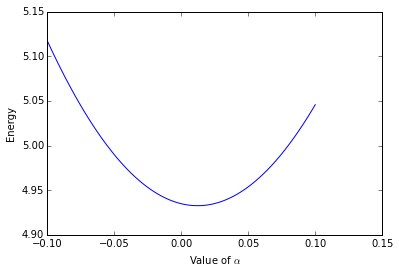

In [7]:
n_alpha = 101
alpha_vals = np.linspace(-0.1,0.1,n_alpha)
energy2 = np.zeros(n_alpha)
i=0
e_min = 1e30
alph_min = 0.0
for alpha in alpha_vals:
    psi = basis_array[0] + alpha*basis_array[1]
    H_psi = -0.5*(d2basis_array[0] + alpha*d2basis_array[1])
    add_pot_on_basis(H_psi,Vdiag,psi)
    norm = integrate_functions(psi,psi,num_x_points,dx)
    #print alpha, norm
    #print Hmat2[0,0] + Hmat2[1,0]*alpha + Hmat2[0,1]*alpha + Hmat2[1,1]*alpha*alpha
    energy2[i] = integrate_functions(psi,H_psi,num_x_points,dx)/norm
    if energy2[i]<e_min:
        e_min = energy2[i]
        alpha_min = alpha
    i=i+1
print "Min E and alph: ",e_min, alpha_min
pl.plot(alpha_vals,energy2)
pl.xlabel(r"Value of $\alpha$")
pl.ylabel("Energy")

You can compare these results to the perturbation theory results in the odd perturbation notebook - they are almost identical.  Now what happens if we make the field stronger ? For perturbation theory, the simple first order corrections failed.

Full Hamiltonian
   4.935   -3.603    0.000   -0.288    0.000   -0.079    0.000   -0.033    0.000   -0.017
  -3.603   19.739   -3.891   -0.000   -0.368   -0.000   -0.112   -0.000   -0.049    0.000
   0.000   -3.891   44.413   -3.970   -0.000   -0.400   -0.000   -0.129    0.000   -0.059
  -0.288   -0.000   -3.970   78.957   -4.003   -0.000   -0.417   -0.000   -0.138   -0.000
   0.000   -0.368   -0.000   -4.003  123.370   -4.019    0.000   -0.426   -0.000   -0.144
  -0.079   -0.000   -0.400   -0.000   -4.019  177.653   -4.029   -0.000   -0.432    0.000
   0.000   -0.112   -0.000   -0.417    0.000   -4.029  241.805   -4.035    0.000   -0.436
  -0.033   -0.000   -0.129   -0.000   -0.426   -0.000   -4.035  315.827   -4.039    0.000
   0.000   -0.049    0.000   -0.138   -0.000   -0.432    0.000   -4.039  399.719   -4.042
  -0.017   -0.000   -0.059   -0.000   -0.144    0.000   -0.436    0.000   -4.042  493.480


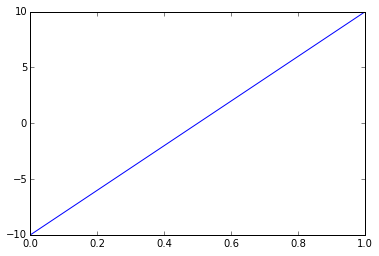

In [8]:
Vdiag2 = np.linspace(0.0,width,num_x_points)
square_well_linear_potential(x,Vdiag2,20.0) # A much larger potential
# Declare space for the matrix elements
Hmat3 = np.eye(num_basis)

# Loop over basis functions phi_n (the bra in the matrix element)
print "Full Hamiltonian"
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # Act with H on phi_m and store in H_phi_m
        H_phi_m = -0.5*d2basis_array[m] 
        add_pot_on_basis(H_phi_m,Vdiag2,basis_array[m])
        # Create matrix element by integrating
        Hmat3[m,n] = integrate_functions(basis_array[n],H_phi_m,num_x_points,dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % Hmat3[m,n],
    # This print puts in a new line when we have finished looping over m
    print

Ground state energy:  4.08338931328
Ground state wavevector:  [  9.73020341e-01   2.29548881e-01   2.26424844e-02   4.99446267e-03
   8.93004688e-04   5.21069181e-04   1.27824770e-04   1.14624515e-04
   3.24084063e-05   3.62462861e-05]
Min E and alph:  4.10605694331 0.24


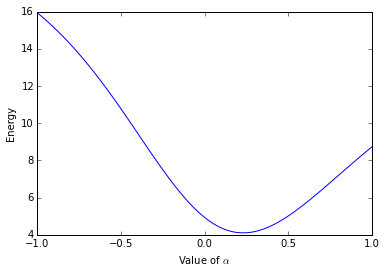

In [9]:
# Use exact algebra to find the result for comparison
import numpy.linalg as la
evals, evecs = la.eigh(Hmat3)
print "Ground state energy: ",evals[0]
print "Ground state wavevector: ",evecs[:,0]

# Now set up the simple parameter scan
n_alpha = 101
alpha_vals = np.linspace(-1,1,n_alpha)
energy3 = np.zeros(n_alpha)
i=0
e_min = 1e30
alph_min = 0.0
for alpha in alpha_vals:
    psi = basis_array[0] + alpha*basis_array[1]
    H_psi = -0.5*(d2basis_array[0] + alpha*d2basis_array[1])
    add_pot_on_basis(H_psi,Vdiag2,psi)
    norm = integrate_functions(psi,psi,num_x_points,dx)
    #print alpha, norm
    #print Hmat2[0,0] + Hmat2[1,0]*alpha + Hmat2[0,1]*alpha + Hmat2[1,1]*alpha*alpha
    energy3[i] = integrate_functions(psi,H_psi,num_x_points,dx)/norm
    if energy3[i]<e_min:
        e_min = energy3[i]
        alpha_min = alpha
    i=i+1
print "Min E and alph: ",e_min, alpha_min
pl.plot(alpha_vals,energy3)
pl.xlabel(r"Value of $\alpha$")
pl.ylabel("Energy")

We can see that this rather simple variational approach does a remarkably good job: we get within 1% of the ground state energy.  Looking at the coefficients of the exact solution, we can see that we'd really need to include further states to fully map out the effects of this rather strong field.  There are various approaches to multi-parameter minimisation which I will describe in a separate notebook.